In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

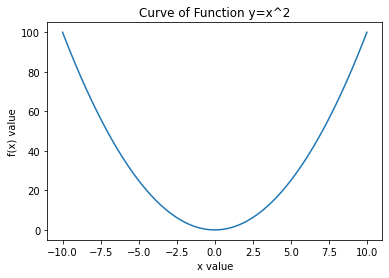

In [3]:
x_plot = np.linspace(-10, 10, 400)
y_plot = torch.tensor(x_plot)**2

# 绘制曲线
plt.plot(x_plot, y_plot)

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.title('Curve of Function y=x^2')
plt.show()

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(5.0, requires_grad=True)
y0 = x0**2

alpha = 0.1
epsilon = 0.0001

x_values = []
y_values = []

# 循环直到y的变化小于epsilon
while True:
    # 计算梯度
    y0.backward()
    y = y0.item()  # 保存y0在当前迭代的取值，用于判断迭代的停止条件
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y0 = x0**2
    # 检查是否满足结束条件
    if abs(y0.item() - y) < epsilon:
        break

y0.backward()
print("x0: ", x0, "y0: ", y0, "x0.grad: ", x0.grad)

x0:  tensor(0.0121, requires_grad=True) y0:  tensor(0.0001, grad_fn=<PowBackward0>) x0.grad:  tensor(0.0242)


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(5.0, requires_grad=True)
y0 = x0**2

alpha = 0.1

x_values = []
y_values = []

for _iter in range(8):
    x_values.append(x0.item())
    y_values.append(y0.item())
    # 计算梯度
    y0.backward()
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y0 = x0**2

In [7]:
def target_func(x):
    return torch.sin(x)

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(0.0, requires_grad=True)

alpha = 0.1
epsilon = 0.0001

x_values = []
y_values = []

# 循环直到y的变化小于epsilon
for _iter in range(5):
    # 计算梯度
    x_values.append(x0.item())
    y0 = target_func(x0)
    y0.backward()
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y_values.append(y0.item())

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# 定义函数
def f(x, y):
    return ((4 - 2.1*x**2 + x**4 / 3.) * x**2 + x * y  + (-4 + 4*y**2) * y **2)

In [11]:
learning_rate = 0.1
num_iterations = 20
x0 = -1.0
y0 = -0.5
# 记录函数值
loss_values = []

x_values = [x0]
y_values = [y0]
# 执行梯度下降并记录函数值
x = torch.tensor(x0, requires_grad=True)
y = torch.tensor(y0, requires_grad=True)
for i in range(num_iterations):
    loss = f(x, y)
    loss_values.append(loss.item())
    loss.backward()
    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad
        x.grad.zero_()
        y.grad.zero_()
    x_values.append(x.item())
    y_values.append(y.item())

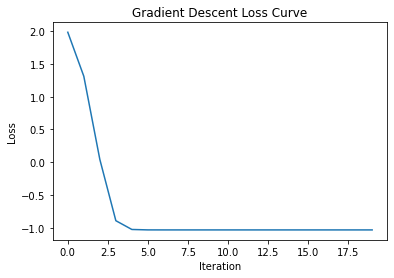

In [12]:
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curve')
plt.show()

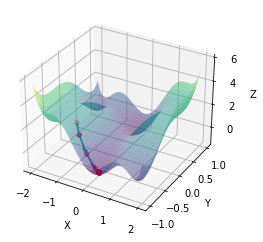

In [13]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.scatter(x_values, y_values, [f(x_val, y_val) for x_val, y_val in zip(x_values, y_values)], color='r')

for i in range(1, len(x_values)):
    x1, y1 = x_values[i-1], y_values[i-1]
    x2, y2 = x_values[i], y_values[i]
    u = x2 - x1
    v = y2 - y1
    w = f(x2, y2) - f(x1, y1)
    z1 = f(x1, y1)
    z2 = f(x2, y2)
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    ax.quiver(x1, y1, f(x1, y1), u, v, w, length=length, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


$$
y = f(x,y) =(1.2x^2+2) x^2+xy+y^2
$$


In [31]:
# 定义函数
def f(x, y):
    return ((1.2*x**2+2+x**4/3)*x**2 +x*y+(2.2*y**2-1)* y **2)

In [32]:
learning_rate = 0.1
num_iterations = 20
x0 = -1.0
y0 = -0.5
# 记录函数值
loss_values = []

x_values = [x0]
y_values = [y0]
# 执行梯度下降并记录函数值
x = torch.tensor(x0, requires_grad=True)
y = torch.tensor(y0, requires_grad=True)
for i in range(num_iterations):
    loss = f(x, y)
    loss_values.append(loss.item())
    loss.backward()
    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad
        x.grad.zero_()
        y.grad.zero_()
    x_values.append(x.item())
    y_values.append(y.item())

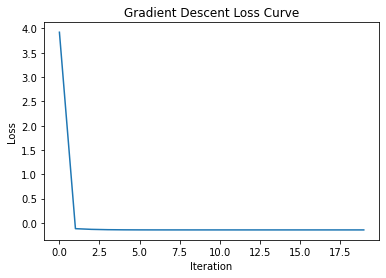

In [33]:
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curve')
plt.show()

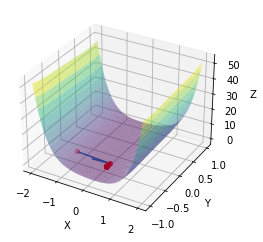

In [34]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.scatter(x_values, y_values, [f(x_val, y_val) for x_val, y_val in zip(x_values, y_values)], color='r')

for i in range(1, len(x_values)):
    x1, y1 = x_values[i-1], y_values[i-1]
    x2, y2 = x_values[i], y_values[i]
    u = x2 - x1
    v = y2 - y1
    w = f(x2, y2) - f(x1, y1)
    z1 = f(x1, y1)
    z2 = f(x2, y2)
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    ax.quiver(x1, y1, f(x1, y1), u, v, w, length=length, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()